# Cuarta versión del entrenamiento

En esta cuarta versión empezaremos modificando los hiperparámetros para probar si se puede mejorar el rendimiento de los modelos. De todas formas, el rendimiento de los modelos ya sería lo suficientemente alto.

En este caso, usaremos los datasets elegidos de la tercera versión del entrenamiento, que son los siguientes:

* Autoinforme: **datasets/autoinforme/v3/dataset_v3_3.csv**
* Familia: **datasets/familia/v3/dataset_v3_3.csv**
* Profesional: **datasets/profesional/v3/dataset_v3_3.csv** 


In [3]:
BAYES_NETWORK_STATE_NAMES_NEW_VERSION_V2 = {
    'curso':['NINGUNO','PRIMARIA', 'ESO', 'BACHILLERATO', 'UNIVERSIDAD', 'OTRO'], 
    'sexo_asignado':['HOMBRE', 'MUJER', 'OTRO'], 
    'transgenero':['SI','NO','NO SE'], 
    'edad':['12-16', '17-18', '19-21'], 
    'situacion_laboral_padre':['NO TRABAJA', 'TRABAJA', 'PENSIONADO'], 
    'situacion_laboral_madre': ['NO TRABAJA', 'TRABAJA', 'PENSIONADO'], 
    'nivel_profesional_padre':['NINGUNO', 'BACHILLERATO', 'FORMACION PROFESIONAL', 'UNIVERSIDAD', 'OTRO'], 
    'nivel_profesional_madre':['NINGUNO', 'BACHILLERATO', 'FORMACION PROFESIONAL', 'UNIVERSIDAD', 'OTRO'],
    'nivel_promedio_academico':['INSUFICIENTE', 'SUFICIENTE', 'NOTABLE', 'SOBRESALIENTE', 'EXTRAORDINARIO'],
    'nivel_autopercepcion_masculina':['0','1','2','3','4','5','6'],
    'nivel_autopercepcion_femenina':['0','1','2','3','4','5','6'],
    'nivel_percepcion_masculina_externa':['0','1','2','3','4','5','6'],
    'nivel_percepcion_femenina_externa':['0','1','2','3','4','5','6'],
    'altura':['X<=149', '150-169','170-189','X>=190'],
    'peso':['X<=49', '50-69','70-89','X>=90'],
    'tratamiento_psiquiatrico_previo':['SI','NO'],
    'enfermedad_cronica':['SI','NO'],
    'bullying_victima':['SI','NO'],
    'bullying_perpetrador':['SI','NO'],
    'cyberbullying_victima':['SI','NO'],
    'cyberbullying_perpetrador':['SI','NO'],
    'adiccion_alcohol':['SI','NO'],
    'adiccion_sustancias':['SI','NO'],
    'adiccion_internet':['SI','NO'],
    'problemas_interiorizados':['SI','NO'],
    'problemas_exteriorizados':['SI','NO'],
    'problemas_contexto':['SI','NO'],
    'problemas_recursos_psicologicos':['SI','NO'],
    'fuente_discriminacion':['NINGUNO', 'GENERO', 'RAZA', 'ORIENTACION SEXUAL', 'OTRO'],
    'nivel_resiliencia':['1','2','3','4','5'],
    'nivel_regulacion_positiva':['1','2','3','4','5'],
    'nivel_regulacion_negativa':['1','2','3','4','5'],
    'atrapamiento_interno':['SI','NO'],
    'atrapamiento_externo':['SI','NO'],
    'nivel_percibido_fracaso':['BAJO','MEDIO', 'ALTO'],
    'sentido_pertenencia_frustrada':['SI','NO'],
    'percepcion_de_ser_una_carga':['SI','NO'],
    'autoeficiencia_para_el_suicidio':['SI', 'NO'],
    'madre_adolescente':['SI', 'NO'],
    'padre_adolescente':['SI', 'NO'],
    'padres_divorciados':['SI', 'NO'],
    'familia_monoparental':['SI', 'NO'],
    'tratamiento_psicologico_padre_madre':['SI', 'NO'],
    'adiccion_padre_madre':['SI', 'NO'],
    'relaciones_conflictivas_hijo_padre_madre':['SI', 'NO'],
    'familia_reconstruida':['SI', 'NO'],
    'busqueda_informacion_autolesion':['SI', 'NO'],
    'compartir_en_rrss_pensamiento_autolesion':['SI', 'NO'],
    'peticion_de_ayuda_en_internet':['SI', 'NO'],
    'realizacion_autolesion_despues_de_ver_contenido':['SI', 'NO'], 
    'tener_conocidos_que_comparten_autolesion_internet':['SI', 'NO'],
    'contacto_informacion_autolesion':['SI', 'NO'],
    'denuncia_autolesion_internet':['SI', 'NO'],
    'aceptacion_rechazo_parental':['ACEPTACION', 'RECHAZO'],
    'control_parental':['SI', 'NO'],
    'situacion_economica_precaria':['SI', 'NO'],
    'estudios_de_la_madre':['SI', 'NO'],
    'estudios_del_padre':['SI', 'NO'],
    'supervision_parental_insuficiente':['SI', 'NO'],
    'maltrato_al_adolescente':['SI', 'NO'],        
    'maltrato_a_la_pareja':['SI', 'NO'],
    'duelo':['SI', 'NO'],
    'ingreso_familiar_mensual':['X<=999', '1000-1499','1500-1999','X>=2000'],
    'desenlace':['NINGUNO','AUTOLESION','IDEACION','PLANIFICACION','INTENCION']
}

# Parámetros de entrenamiento

Para empezar, establecemos los siguientes parámetros del entrenamiento:
* _test_size_:indica el tipo de división que tendrá el dataset. Por ejemplo, si test_size = 0.3, el 70% del dataset se utilizará para el entrenamiento del modelo, mientras que el 30% se usará para el testeo.
* _average_: parámetro que especifica cómo se calcularán las métricas de la prueba del rendimiento. Puede tener los valores weighted y micro. _micro_ calcula la métrica global a través de todas las clases, sin tener en cuenta la distribución de clases. Por lo tanto, los resultados de accuracy, precision, recally f1_score tendrán el mismo resultado. _weighted_ sí tiene en cuenta la distribución de todas las clases, en este caso, de las clases NINGUNO,AUTOLESION,COMUNICACION, DESEO,IDEACION,PLANIFICACION e INTENCION. Calcula la métrica de cada clase y luego la pondera según el número de instancias reales en cada clase. 


In [4]:
# Establecer nombre del dataset y el tipo de modelo para las pruebas
# Posibles valores: autoinforme, familia o profesional
modelType = 'autoinforme'
datasetName = 'dataset_v3_3.csv'
test_size = 0.3
average = 'weighted'

# Preparación del dataframe
A continuación, cargamos el respectivo dataframe de la carpeta especificada.

Extraemos toda la información del dataset y lo guardamos en un dataframe de la librería *Pandas*. El contenido del dataframe es el siguiente:

In [7]:
import pandas as pd
df = pd.read_csv('../datasets/'+modelType+'/v3/' + datasetName)

df

,id,edad,curso,peso,altura,sexo_asignado,transgenero,nivel_promedio_academico,situacion_laboral_madre,situacion_laboral_padre,...,relaciones_conflictivas_hijo_padre_madre,familia_reconstruida,busqueda_informacion_autolesion,compartir_en_rrss_pensamiento_autolesion,peticion_de_ayuda_en_internet,realizacion_autolesion_despues_de_ver_contenido,tener_conocidos_que_comparten_autolesion_internet,contacto_informacion_autolesion,denuncia_autolesion_internet,desenlace
0,1,12-16,ESO,50-69,150-169,Hombre,No,Notable,Trabaja,Trabaja,...,No,No,No,No,No,No,No,No,No,Ninguno
1,2,12-16,ESO,70-89,150-169,Mujer,No,Suficiente,Trabaja,No trabaja,...,No,No,No,No,No,No,No,No,No,Ideacion
2,3,17-18,Bachillerato,50-69,150-169,Otro,Si,Notable,No trabaja,Trabaja,...,Si,No,Si,Si,Si,Si,Si,Si,No,Autolesion
3,4,19-21,Universidad,x>=90,170-189,Hombre,No,Extraordinario,Pensionado,Trabaja,...,Si,No,Si,Si,Si,Si,Si,Si,Si,Planificacion
4,5,12-16,ESO,50-69,150-169,Mujer,No,Insuficiente,No trabaja,No trabaja,...,Si,Si,Si,No,No,No,No,No,No,Intencion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,312,17-18,Bachillerato,70-89,170-189,Mujer,No,Sobresaliente,No trabaja,No trabaja,...,No,No,No,No,No,No,No,No,No,Planificacion
291,313,12-16,ESO,x<=49,x<=149,Hombre,No,Suficiente,No trabaja,No trabaja,...,No,No,Si,Si,Si,Si,Si,Si,No,Planificacion
292,325,12-16,ESO,50-69,150-169,Mujer,No,Suficiente,No trabaja,No trabaja,...,No,No,No,No,No,No,No,No,No,Intencion
293,326,17-18,Bachillerato,70-89,170-189,Hombre,No,Suficiente,Trabaja,Trabaja,...,No,No,No,No,No,No,No,No,No,Intencion


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 55 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   id                                                 295 non-null    int64 
 1   edad                                               295 non-null    object
 2   curso                                              295 non-null    object
 3   peso                                               295 non-null    object
 4   altura                                             295 non-null    object
 5   sexo_asignado                                      295 non-null    object
 6   transgenero                                        295 non-null    object
 7   nivel_promedio_academico                           295 non-null    object
 8   situacion_laboral_madre                            295 non-null    object
 9   situacion_laboral_pad

## Decodificación del dataframe
Preparamos el dataframe para convertir los valores de las columnas a valores numéricos y borrar aquellas columnas que no son necesarias para la clasificación.

Se elimina la columna Index, debido a que es una columna que no influye en la creación del modelo. 

In [47]:
import numpy as np
from pandas.api.types import is_numeric_dtype


def removeWhiteSpaces(df):
    
    for index, row in df.iterrows():
        for key in row.keys():
            if isinstance(row[key], str) and not row[key].isnumeric():
                row[key] = row[key].strip()
                if key == 'edad':
                    numeric_age = False
                if  key == 'altura':
                    numeric_height = False
                if  key == 'peso':
                    numeric_weight = False
    return df

def codeAgeColumn(age):
    if age >= 12 and age <= 16:
        return '12-16'
    elif age == 17 or age == 18:
        return '17-18'
    elif age >=19 and age <= 21:
        return '19-21'
    else:
        return False
    
def codeHeightColumn(height):
    if height <= 149:
        return "x<=149".upper()
    elif height >= 150 or height < 170:
        return "150-169"
    elif height >= 170 or height < 190:
        return "180-189"
    elif height >= 190:
        return "x>=190".upper()
    else:
        return False
    
def codeWeightColumn(weight):
        if weight <= 49:
            return "x<=49".upper()
        elif weight >= 50 or weight < 70:
            return "50-69"
        elif weight >= 70 or weight < 90:
            return "80-89"
        elif weight >= 90:
            return "x>=90".upper()
        else:
            return False
    
def codeMonthlyFamiliarIncome(income):
    if income <= 999:
        return "X<=999"
    elif income >= 1000 and income < 1500:
        return "1000-1499"
    elif income >= 1500 and income < 1999:
        return "1500-1999"
    elif income >= 2000:
        return "X>=2000"
    else:
        return False

def changeValuesToNumeric(df):
    newData = df.apply(lambda x: x.astype(str).str.upper())

    items = BAYES_NETWORK_STATE_NAMES_NEW_VERSION_V2.items()
    for key, values in items:
        if key in newData and key.lower() != 'desenlace':
            newData[key] = newData[key].apply(lambda x: values.index(x.strip()))

    return newData

def codeDataset(df):
    newDF = df

    newDF = removeWhiteSpaces(newDF)

    if 'edad' in newDF.columns and is_numeric_dtype(newDF['edad']):
        newDF['edad'] = newDF['edad'].apply(codeAgeColumn)
    if 'altura' in newDF.columns and is_numeric_dtype(newDF['altura']):
        newDF['altura'] = newDF['altura'].apply(codeHeightColumn)
    if 'peso' in newDF.columns and is_numeric_dtype(newDF['peso']):
        newDF['peso'] = newDF['peso'].apply(codeWeightColumn)
    #if 'ingreso_familiar_mensual' in newDF:
        #newDF['ingreso_familiar_mensual'] = newDF['ingreso_familiar_mensual'].apply(codeMonthlyFamiliarIncome)

    newDF = changeValuesToNumeric(newDF)

    return newDF

In [48]:
df = codeDataset(df)
df

,id,edad,curso,peso,altura,sexo_asignado,transgenero,nivel_promedio_academico,situacion_laboral_madre,situacion_laboral_padre,...,relaciones_conflictivas_hijo_padre_madre,familia_reconstruida,busqueda_informacion_autolesion,compartir_en_rrss_pensamiento_autolesion,peticion_de_ayuda_en_internet,realizacion_autolesion_despues_de_ver_contenido,tener_conocidos_que_comparten_autolesion_internet,contacto_informacion_autolesion,denuncia_autolesion_internet,desenlace
0,1,0,2,1,1,0,1,2,1,1,...,1,1,1,1,1,1,1,1,1,NINGUNO
1,2,0,2,2,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,IDEACION
2,3,1,3,1,1,2,0,2,0,1,...,0,1,0,0,0,0,0,0,1,AUTOLESION
3,4,2,4,3,2,0,1,4,2,1,...,0,1,0,0,0,0,0,0,0,PLANIFICACION
4,5,0,2,1,1,1,1,0,0,0,...,0,0,0,1,1,1,1,1,1,INTENCION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,312,1,3,2,2,1,1,3,0,0,...,1,1,1,1,1,1,1,1,1,PLANIFICACION
291,313,0,2,0,0,0,1,1,0,0,...,1,1,0,0,0,0,0,0,1,PLANIFICACION
292,325,0,2,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,INTENCION
293,326,1,3,2,2,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,INTENCION


## División del dataframe

De este dataframe, se dividirán los datos de entrenamiento y de prueba. La división se hará utilizando los parámetros de average y test_size, que se establecieron al principio de este cuaderno.

*X* representa las características del conjunto de datos

*y* representa las etiquetas del conjunto de datos.

random_state=1 para proporcionar una semilla para la generación de números aleatorios. De esta manera, la división no es la misma cada vez que se ejecute la función, lo que asegura que la división sea reproducible.



In [49]:
from sklearn.model_selection import train_test_split

numberColumns = len(df.columns) 

X, y = df.values[:,0:(numberColumns - 1)], df.values[:,(numberColumns - 1)]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

# Carga y entrenamiento del modelo seleccionado
En este caso, a diferencia de la tercera versión, realizaremos un ajuste de hiperparámetros. En este caso, el modelo GaussianNB 
Entrenamos al modelo usando el clasificador Gaussian Näive-Bayes.

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import pickle
import os  

param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100) # devuelve un array de 100 elementos.
}

clf_NB=GaussianNB()

grid_search = GridSearchCV(estimator=clf_NB, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

classNames = np.unique(df['desenlace'].to_numpy())
#clf_NB.fit(X_train, y_train)

best_model = grid_search.best_estimator_

cv_results = grid_search.cv_results_

#print(best_params)
print(best_model)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=np.float64(1.873817422860387e-09))


# Predicción del modelo entrenado
Hacemos una predicción de los datos de testeo X_test

In [51]:
# Hacemos una prediccion de los datos de testing
y_pred = grid_search.predict(X_test)

compareDF = pd.DataFrame()

compareDF['Real Result'] = y_test
compareDF['Predicted Result'] = y_pred
compareDF.head()

,Real Result,Predicted Result
0,NINGUNO,NINGUNO
1,NINGUNO,NINGUNO
2,NINGUNO,NINGUNO
3,PLANIFICACION,INTENCION
4,PLANIFICACION,NINGUNO


# Matriz de Confusión
Creamos la matriz de confusión. En este caso, los posibles resultados podían ser 0, 1 y 2 (columna *target*) --> setosa, versicolor, virginica (columna *target_names*). Por lo tanto, la matriz de resultado no sería una matriz 2x2 convencional, sino una 3x3.

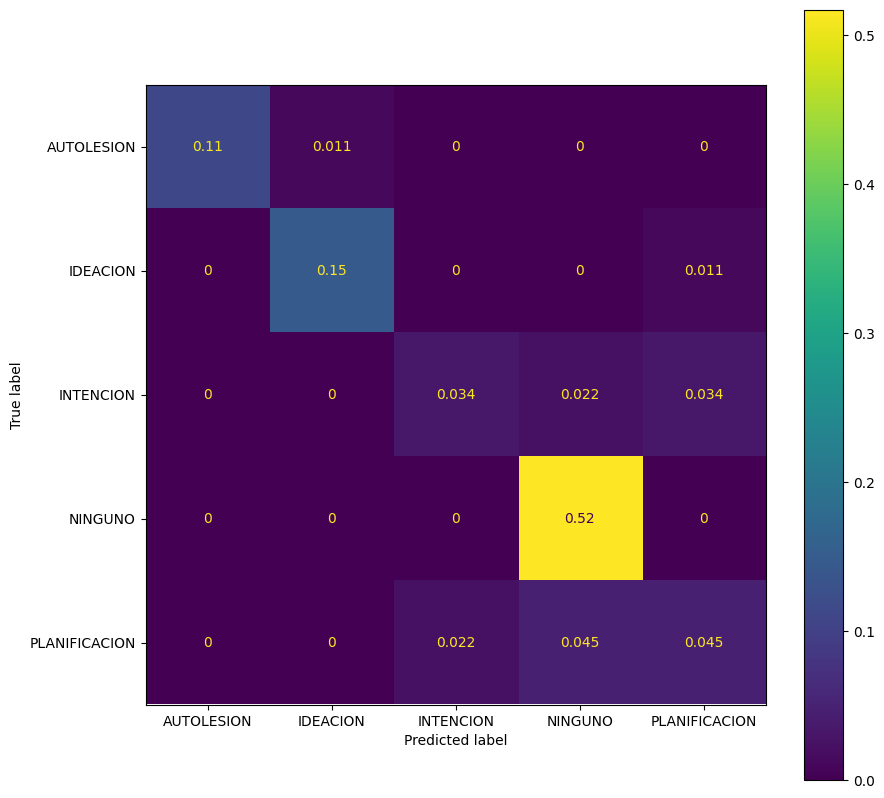

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import sys

classNames = np.unique(df['desenlace'].to_numpy())

cm = confusion_matrix(y_test, y_pred, labels=classNames, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classNames)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()



## Verdaderos y falsos positivos y negativos

A continuación obtenemos el número de verdaderos/falsos positivos y verdaderos/falsos negativos de cada clase presente.

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=classNames)

def calculate_tp_fp_tn_fn(conf_matrix):
    num_classes = conf_matrix.shape[0]
    tp = np.diag(conf_matrix)
    fp = np.sum(conf_matrix, axis=0) - tp
    fn = np.sum(conf_matrix, axis=1) - tp
    tn = np.sum(conf_matrix) - (fp + fn + tp)
    #tn = []
    #for i in range(num_classes):
        #temp_conf_matrix = np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1)
        #tn.append(np.sum(temp_conf_matrix))

    return tp, fp, tn, fn

tp, fp, fn, tn = calculate_tp_fp_tn_fn(conf_matrix)

print("Verdaderos positivos totales: " + str(np.sum(tp)))
print("Falsos positivos totales: " + str(np.sum(fp)))
print("Verdaderos negativos totales: " + str(np.sum(tn)))
print("Falsos negativos totales: " + str(np.sum(fn)))
print("\n")

for i, className in enumerate(classNames):
    classnameLowered = className.lower()
    print("Verdaderos positivos "+classnameLowered+": " + str(tp[i]))
    print("Falsos positivos "+classnameLowered+": " + str(fp[i]))
    print("Verdaderos negativos "+classnameLowered+": " + str(tn[i]))
    print("Falsos negativos "+classnameLowered+": " + str(fn[i]))
    print("\n")


Verdaderos positivos totales: 76
Falsos positivos totales: 13
Verdaderos negativos totales: 13
Falsos negativos totales: 343


Verdaderos positivos autolesion: 10
Falsos positivos autolesion: 0
Verdaderos negativos autolesion: 1
Falsos negativos autolesion: 78


Verdaderos positivos ideacion: 13
Falsos positivos ideacion: 1
Verdaderos negativos ideacion: 1
Falsos negativos ideacion: 74


Verdaderos positivos intencion: 3
Falsos positivos intencion: 2
Verdaderos negativos intencion: 5
Falsos negativos intencion: 79


Verdaderos positivos ninguno: 46
Falsos positivos ninguno: 6
Verdaderos negativos ninguno: 0
Falsos negativos ninguno: 37


Verdaderos positivos planificacion: 4
Falsos positivos planificacion: 4
Verdaderos negativos planificacion: 6
Falsos negativos planificacion: 75




# Cálculo de métricas del entrenamiento

Para calcular el rendimiento del entrenamiento, se calcularán 4 métricas distintas.

* Accuracy
* Precision
* Recall
* F1

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average=average)
recall = recall_score(y_true=y_test, y_pred=y_pred, average=average)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average=average)

print('Exactitud - Accuracy: %.3f' % accuracy)
print('Precision: %.3f' % precision)
print('Sensibilidad - Recall: %.3f' % recall)
print('F1: %.3f' % f1)

Exactitud - Accuracy: 0.854
Precision: 0.837
Sensibilidad - Recall: 0.854
F1: 0.840


# Estimación del error del entrenamiento

Para calcular la estimación del error, se utilizó la validación cruzada. 

La validación cruzada es una técnica para asegurar que el modelo entrenado se ajusta correctamente a los datos de entrenamiento y que además puede predecir correctamente datos no vistos. 

De esta manera, podemos generar una estimación más robusta del error.

En este caso, vamos a utilizar los valores por defecto. 
Se ha reemplazado el anterior método de Bootstraping de la primera versión del cuaderno de Jupyter por su falta de consistencia. 

Es decir, los valores del resultado y el error aproximado cambiaban cada vez que se volvían a ejecutar. 

In [55]:
from sklearn.model_selection import cross_validate

cv_scores = cross_validate(best_model, X, y, cv=5, scoring='accuracy')

# Imprimir los resultados
print("Desviación estándar de los scores:", np.std(cv_scores['test_score']))

Desviación estándar de los scores: 0.06025894520213958


# Guardar el modelo

Guardamos el modelo para que se puedan cargar y usar en cualquier momento.


In [56]:

from datetime import datetime

filePath = 'configFilesJupyter/'+modelType
#filename = filePath + 'model_autoinforme.sav'

if os.path.exists(filePath) == False:
    os.mkdir(filePath)
    
data = {
    'model': clf_NB,
    'metrics': {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    },
}

now = datetime.now()
versionDateTime = now.strftime("%Y%m%d%H%M%S")
filename = filePath + '/' + 'model_'+ modelType +'_v4_' + versionDateTime + '.sav'


# Guardamos el modelo en un archivo .pickle
pickle.dump(data, open(filename, 'wb'))